In [1]:
pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


In [119]:
#Data management
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#visualization
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import tree

#modeling
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import StratifiedKFold, cross_val_score

#evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

In [121]:
df=pd.read_csv(r"C:\Users\reaga\Downloads\ilpd+indian+liver+patient+dataset\Indian Liver Patient Dataset (ILPD).csv")

In [123]:

# Rename the columns
df.columns = [
    'Age',
    'Gender',
    'Total_Bilirubin',
    'Direct_Bilirubin',
    'Alkaline_Phosphotase',
    'Alamine_Aminotransferase',
    'Aspartate_Aminotransferase',
    'Total_Proteins',
    'Albumin',
    'Albumin_and_Globulin_Ratio',
    'Liver_Disease' 
]

# Preview the renamed DataFrame
print(df.head())


   Age Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   62   Male             10.9               5.5                   699   
1   62   Male              7.3               4.1                   490   
2   58   Male              1.0               0.4                   182   
3   72   Male              3.9               2.0                   195   
4   46   Male              1.8               0.7                   208   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Proteins  \
0                        64                         100             7.5   
1                        60                          68             7.0   
2                        14                          20             6.8   
3                        27                          59             7.3   
4                        19                          14             7.6   

   Albumin  Albumin_and_Globulin_Ratio  Liver_Disease  
0      3.2                        0.74          

In [125]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [127]:
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
581,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [129]:
df.sample(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
457,26,Male,6.8,3.2,140,37,19,3.6,0.9,0.3,1
141,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.9,1
90,60,Male,6.8,3.2,308,404,794,6.8,3.0,0.7,1
501,42,Male,0.8,0.2,127,29,30,4.9,2.7,1.2,1
157,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.5,1
206,40,Male,3.9,1.7,350,950,1500,6.7,3.8,1.3,1
552,46,Male,10.2,4.2,232,58,140,7.0,2.7,0.6,1
350,37,Male,1.3,0.4,195,41,38,5.3,2.1,0.6,1
57,51,Male,0.8,0.2,367,42,18,5.2,2.0,0.6,1
249,33,Male,2.1,1.3,480,38,22,6.5,3.0,0.8,1


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         582 non-null    int64  
 1   Gender                      582 non-null    object 
 2   Total_Bilirubin             582 non-null    float64
 3   Direct_Bilirubin            582 non-null    float64
 4   Alkaline_Phosphotase        582 non-null    int64  
 5   Alamine_Aminotransferase    582 non-null    int64  
 6   Aspartate_Aminotransferase  582 non-null    int64  
 7   Total_Proteins              582 non-null    float64
 8   Albumin                     582 non-null    float64
 9   Albumin_and_Globulin_Ratio  578 non-null    float64
 10  Liver_Disease               582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


In [133]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Liver_Disease'],
      dtype='object')

In [135]:
df.describe

<bound method NDFrame.describe of      Age Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     62   Male             10.9               5.5                   699   
1     62   Male              7.3               4.1                   490   
2     58   Male              1.0               0.4                   182   
3     72   Male              3.9               2.0                   195   
4     46   Male              1.8               0.7                   208   
..   ...    ...              ...               ...                   ...   
577   60   Male              0.5               0.1                   500   
578   40   Male              0.6               0.1                    98   
579   52   Male              0.8               0.2                   245   
580   31   Male              1.3               0.5                   184   
581   38   Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransfe

In [137]:
#Total_Bilirubin vs Direct_Bilirubin: -Strong positive linear relationship (direct bilirubin is part of total bilirubin).
#Aspartate_Aminotransferase vs Alamine_Aminotransferase: -Shows a moderate linear trend — both are liver enzymes.
#Diagonal plots show the distribution (histogram) of each feature. Many variables are right-skewed (e.g., bilirubin, enzymes). 
#Suggests the need for normalization or log-scaling before applying models like logistic regression or SVM.


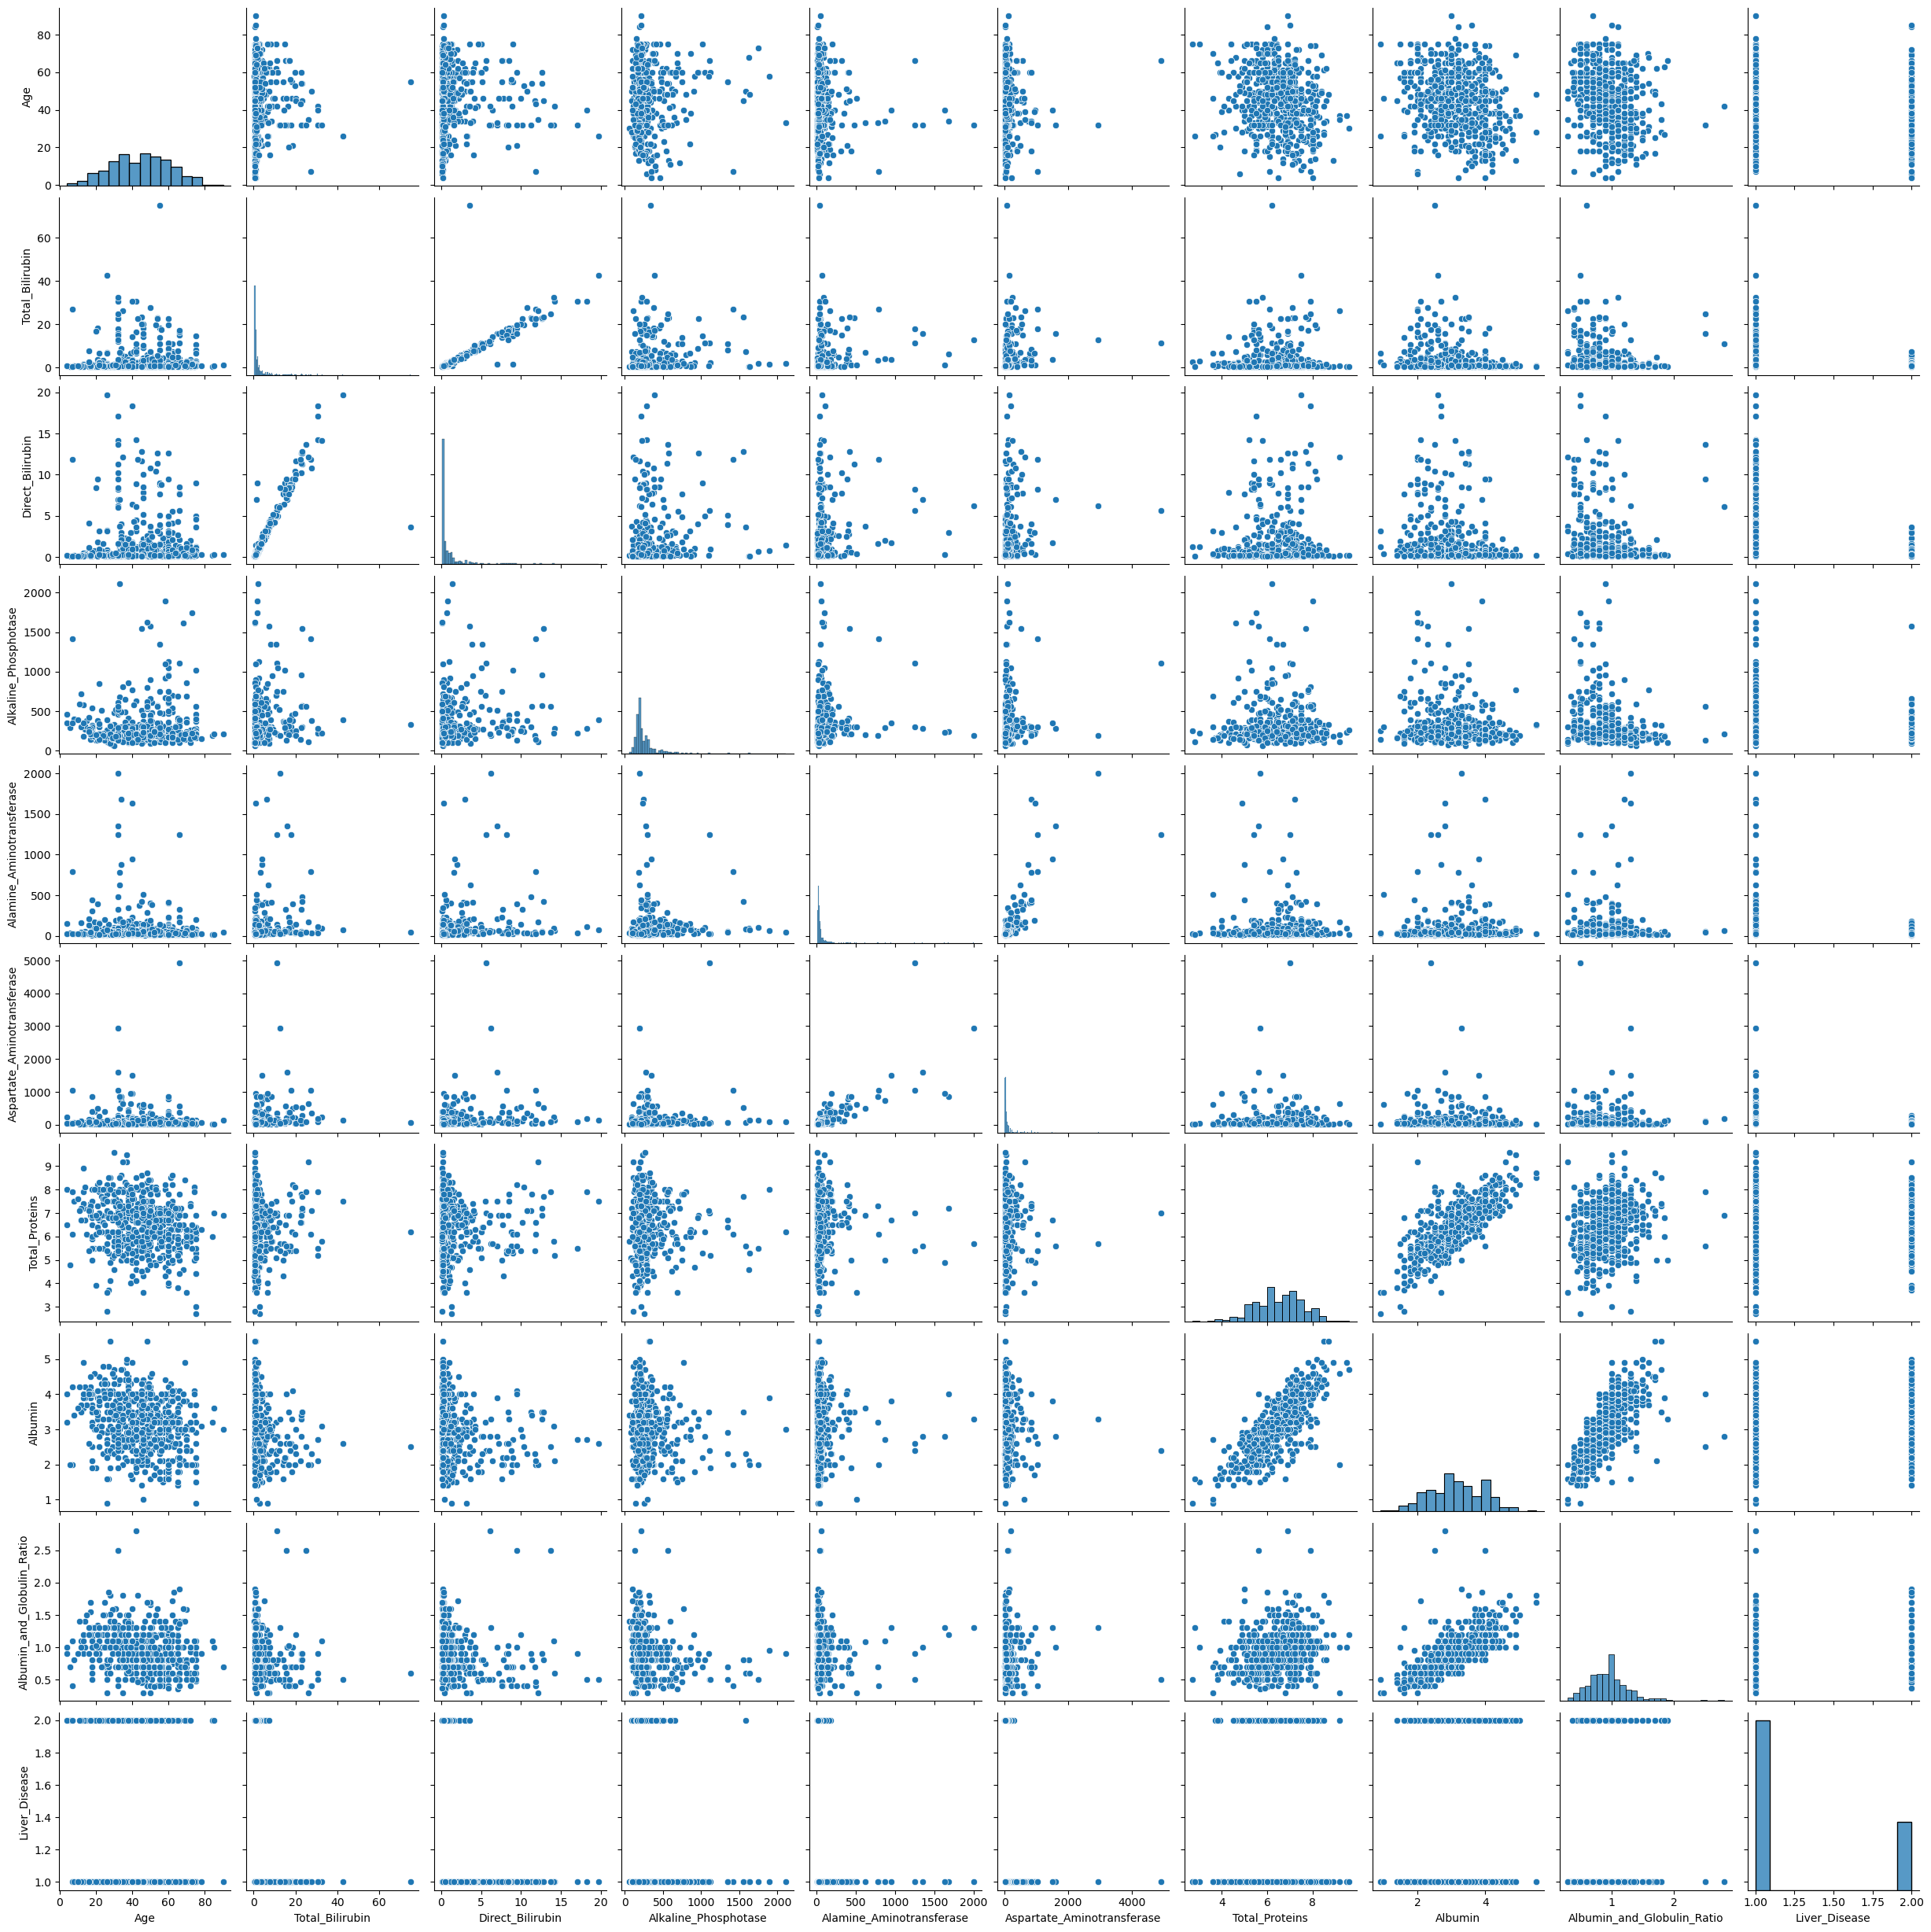

In [13]:
sns.pairplot(df)

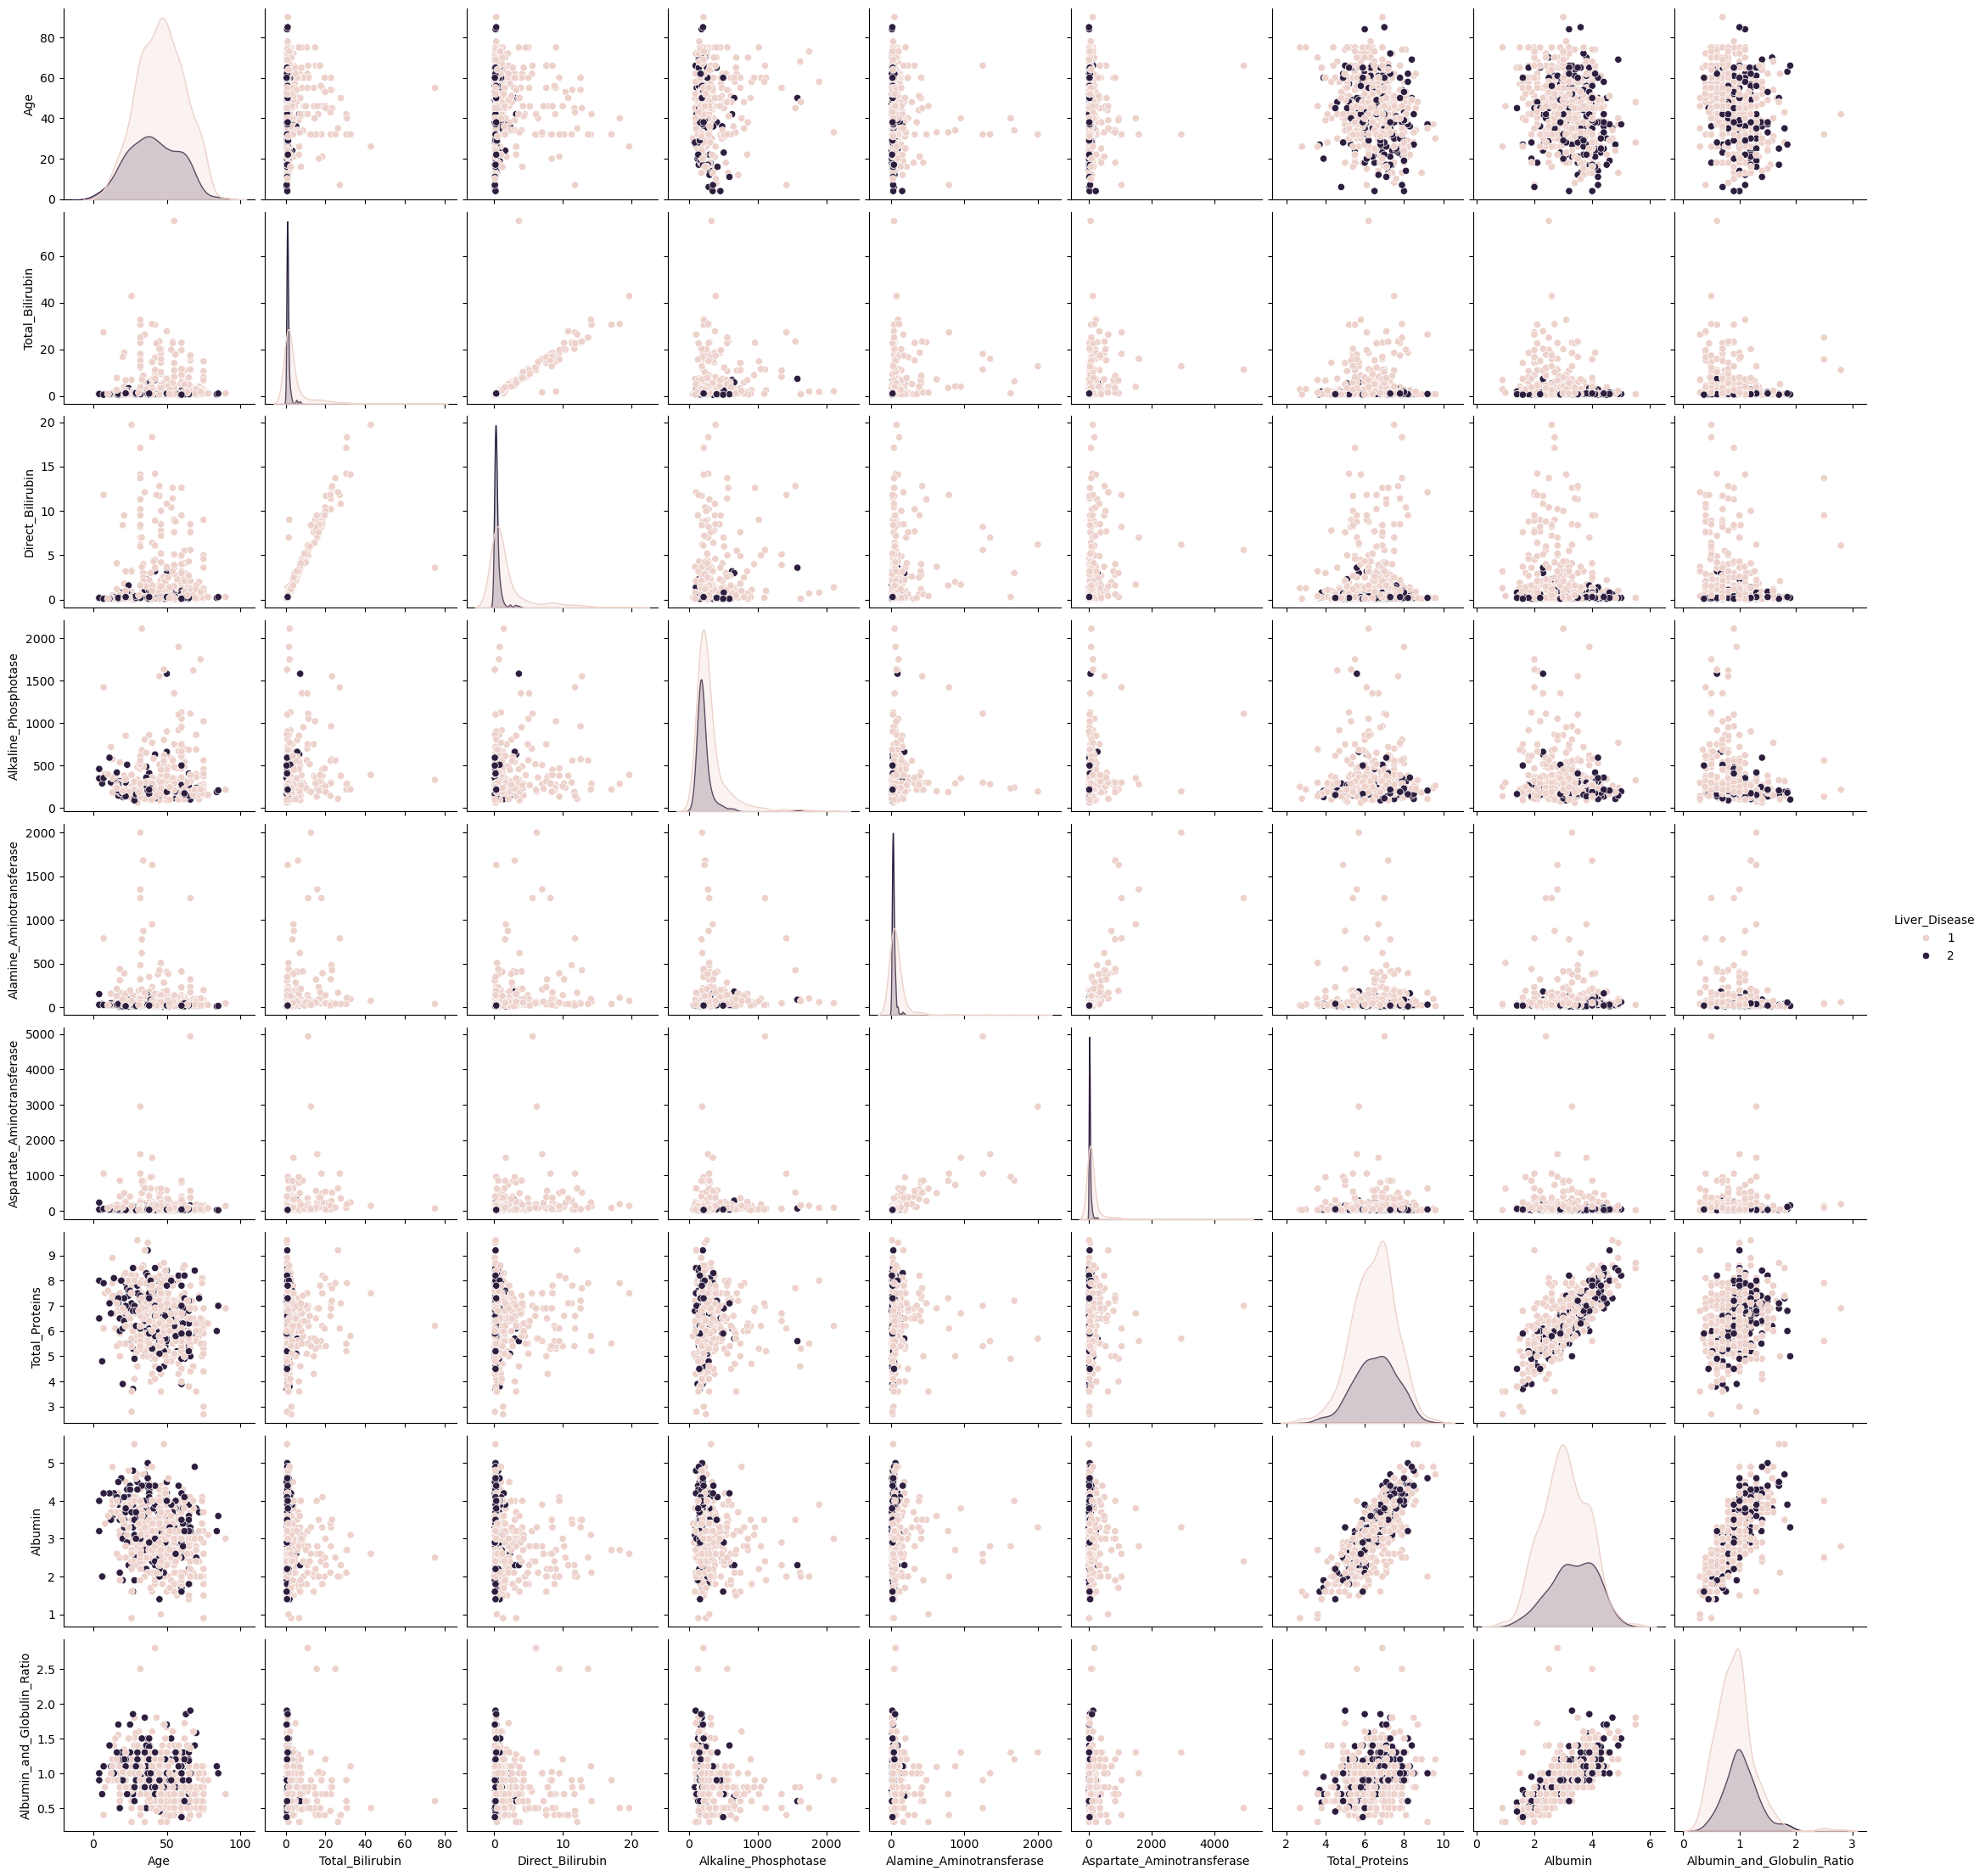

In [14]:
sns.pairplot(df,hue='Liver_Disease')

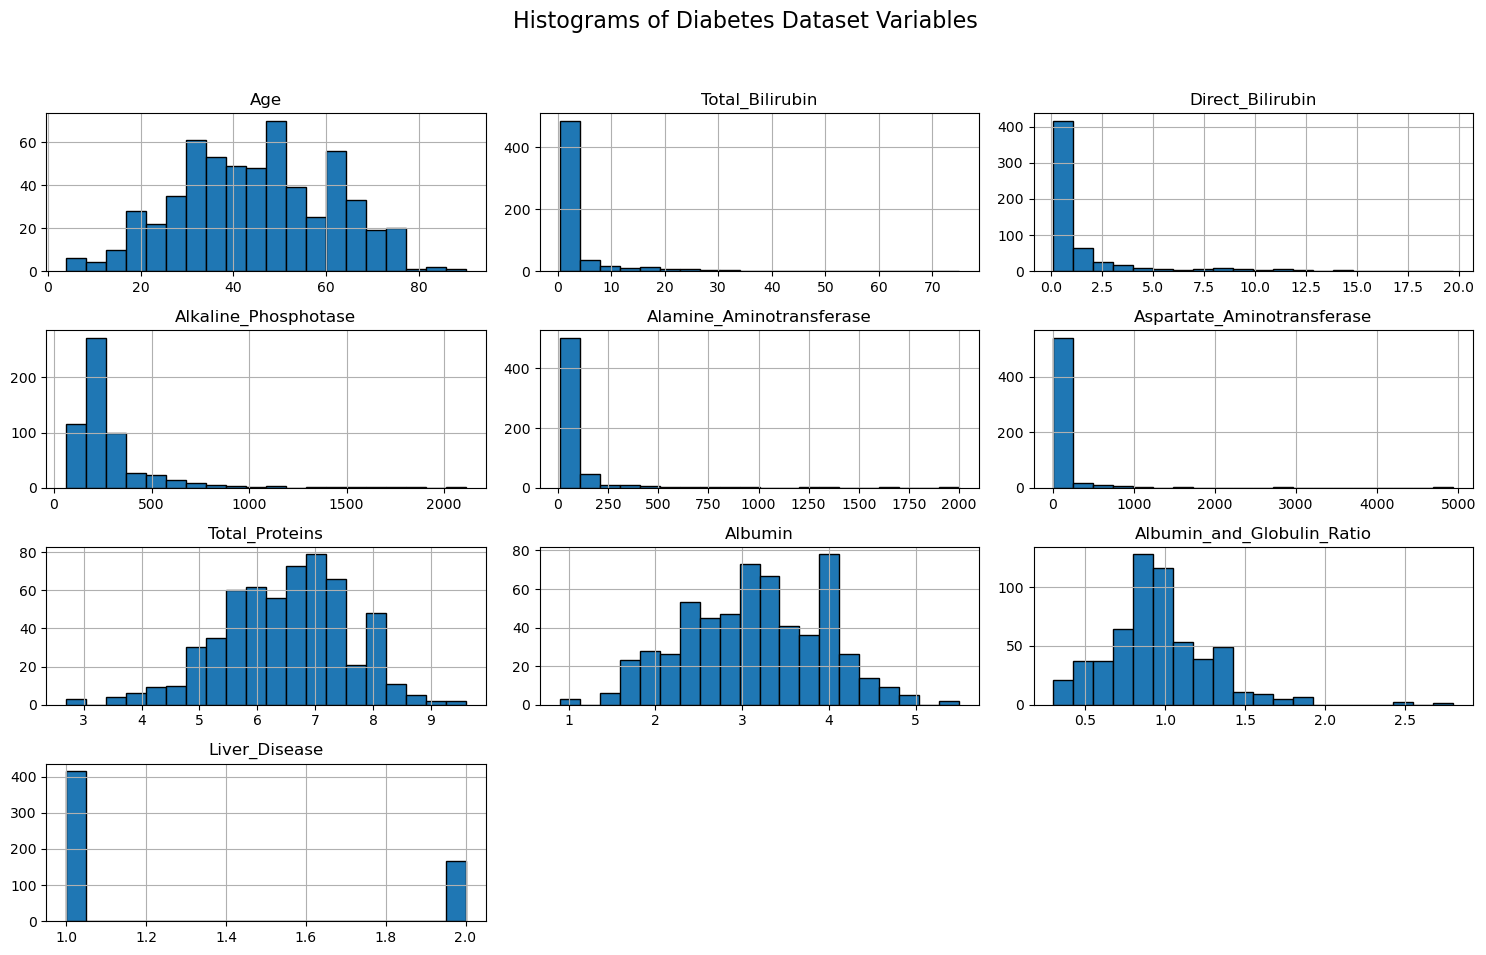

In [15]:

# Set up the plot size and layout
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Diabetes Dataset Variables', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [139]:
#Changing the Target variable (1 = liver disease, 2 = no disease) to (1 = liver disease, 0 = no disease)
df['Liver_Disease']=df['Liver_Disease'].map({ 1:1, 2 : 0 })

In [141]:
print(df['Liver_Disease'])

0      1
1      1
2      1
3      1
4      1
      ..
577    0
578    1
579    1
580    1
581    0
Name: Liver_Disease, Length: 582, dtype: int64


In [143]:
#Applying Label Encoding
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender']) # Male = 1, Female = 0

In [145]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
0,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [147]:
# Check for missing values
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver_Disease                 0
dtype: int64

In [149]:
 # Fill missing numerical values with mean
df.fillna(df.mean(numeric_only=True), inplace=True) 

In [151]:
# Check for missing values
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Liver_Disease                 0
dtype: int64

In [153]:
df.duplicated().sum()

13

In [155]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Liver_Disease'],
      dtype='object')

In [157]:
df2=df[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Liver_Disease']]

In [159]:
# Split features and target
X = df[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin',
       'Albumin_and_Globulin_Ratio']]
y = df['Liver_Disease']


In [161]:
#MinMax scaling
scaler = MinMaxScaler()
df_x = scaler.fit_transform(X)

In [163]:

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [165]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [167]:
X_train.shape

(407, 10)

In [169]:
y_train.shape

(407,)

In [171]:
X_test.shape

(175, 10)

C:\Users\reaga\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\reaga\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



Logistic Regression Results
Accuracy: 0.38285714285714284
Classification Report:
               precision    recall  f1-score   support

           0       0.30      1.00      0.46        46
           1       1.00      0.16      0.28       129

    accuracy                           0.38       175
   macro avg       0.65      0.58      0.37       175
weighted avg       0.82      0.38      0.33       175



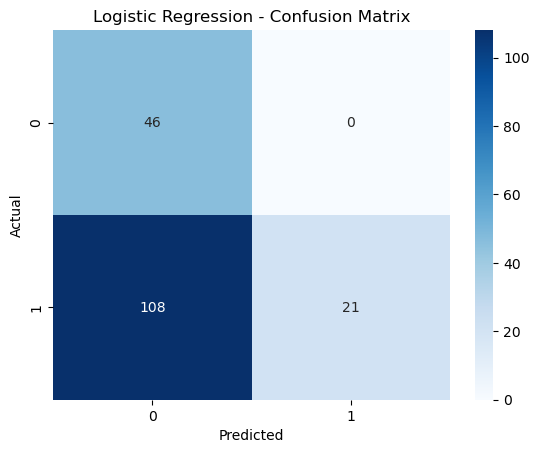

In [173]:

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_X_test_scaled = lr_model.predict(X_test_scaled)

print(f"\nLogistic Regression Results")
print("Accuracy:", accuracy_score(y_test,lr_X_test_scaled))
print("Classification Report:\n", classification_report(y_test,lr_X_test_scaled))

# Plot Confusion Matrix
cm = confusion_matrix(y_test,lr_X_test_scaled)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


K-Nearest Neighbors Results
Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.39      0.39        46
           1       0.78      0.78      0.78       129

    accuracy                           0.68       175
   macro avg       0.59      0.59      0.59       175
weighted avg       0.68      0.68      0.68       175



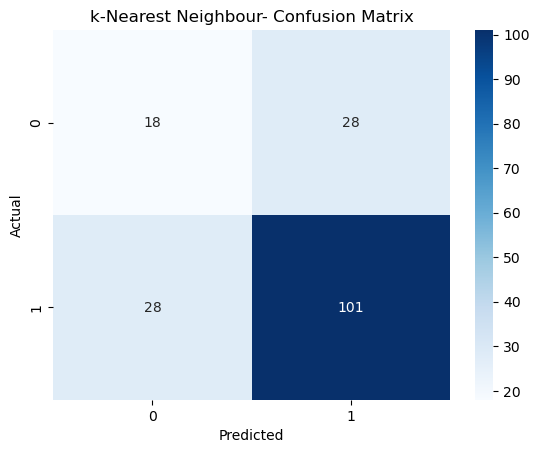

In [175]:

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_X_test_scaled = knn_model.predict(X_test_scaled)


print(f"\nK-Nearest Neighbors Results")
print("Accuracy:", accuracy_score(y_test,knn_X_test_scaled))
print("Classification Report:\n", classification_report(y_test,knn_X_test_scaled))


# Plot Confusion Matrix
cm = confusion_matrix(y_test,knn_X_test_scaled)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"k-Nearest Neighbour- Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




Support Vector Machine
Accuracy: 0.7371428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.74      1.00      0.85       129

    accuracy                           0.74       175
   macro avg       0.37      0.50      0.42       175
weighted avg       0.54      0.74      0.63       175



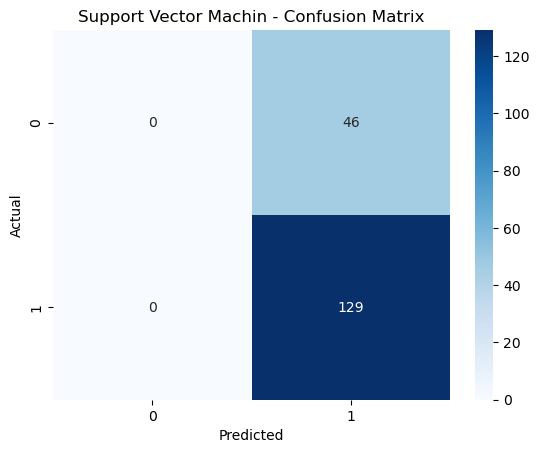

In [177]:

# Support Vector Machine
svm_model = SVC(kernel='linear')  # Linear SVM
svm_model.fit(X_train_scaled, y_train)
svm_X_test_scaled = svm_model.predict(X_test_scaled)


print(f"\nSupport Vector Machine")
print("Accuracy:", accuracy_score(y_test,svm_X_test_scaled))
print("Classification Report:\n", classification_report(y_test,svm_X_test_scaled, zero_division=0))


# Plot Confusion Matrix
cm = confusion_matrix(y_test,svm_X_test_scaled)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Support Vector Machin - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




Random Forest Classifier
Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.35      0.40        46
           1       0.79      0.85      0.82       129

    accuracy                           0.72       175
   macro avg       0.62      0.60      0.61       175
weighted avg       0.70      0.72      0.71       175



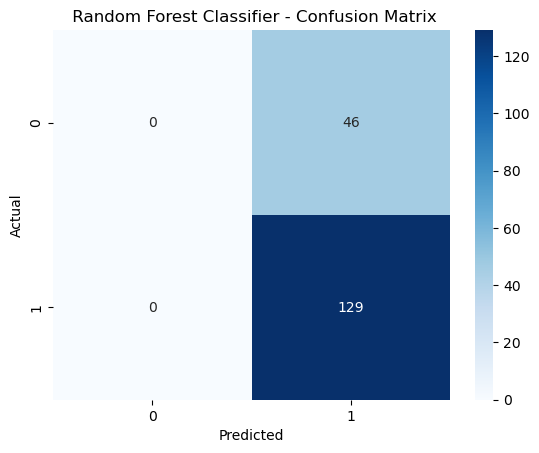

In [178]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
r_X_test_scaled = rf_model.predict(X_test_scaled)

print(f"\nRandom Forest Classifier")
print("Accuracy:", accuracy_score(y_test,r_X_test_scaled))
print("Classification Report:\n", classification_report(y_test,r_X_test_scaled))

# Plot Confusion Matrix
cm = confusion_matrix(y_test,svm_X_test_scaled)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f" Random Forest Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Naive Bayes Classifier 
Accuracy: 0.5771428571428572
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.98      0.55        46
           1       0.98      0.43      0.60       129

    accuracy                           0.58       175
   macro avg       0.68      0.71      0.58       175
weighted avg       0.82      0.58      0.59       175



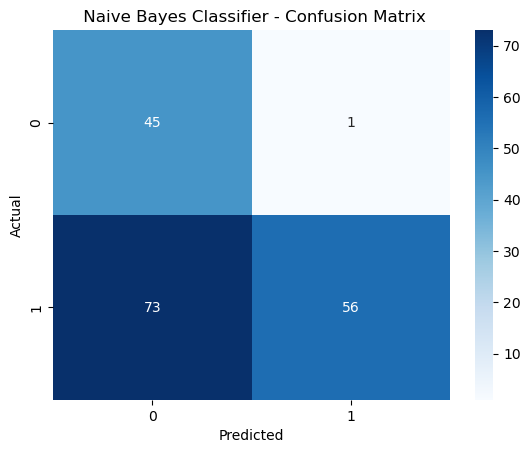

In [180]:
# Naive Bayes Classifier (GaussianNB)
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
nb_X_test_scaled = nb_model.predict(X_test_scaled)

print(f"\nNaive Bayes Classifier ")
print("Accuracy:", accuracy_score(y_test,nb_X_test_scaled))
print("Classification Report:\n", classification_report(y_test,nb_X_test_scaled))



# Plot Confusion Matrix
cm = confusion_matrix(y_test,nb_X_test_scaled)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f" Naive Bayes Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Decision Tree 
Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.30      0.31        46
           1       0.75      0.76      0.76       129

    accuracy                           0.64       175
   macro avg       0.53      0.53      0.53       175
weighted avg       0.64      0.64      0.64       175



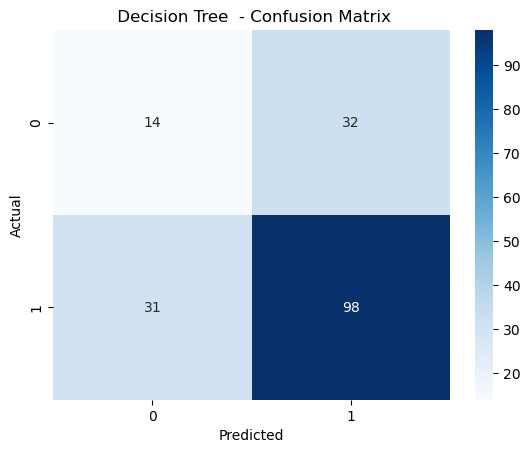

In [181]:
# decision tree model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_scaled, y_train)
dt_X_test_scaled = model_dt.predict(X_test_scaled)

print(f"\nDecision Tree ")
print("Accuracy:", accuracy_score(y_test,dt_X_test_scaled))
print("Classification Report:\n", classification_report(y_test,dt_X_test_scaled))



# Plot Confusion Matrix
cm = confusion_matrix(y_test,dt_X_test_scaled)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f" Decision Tree  - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



booste 
Accuracy: 0.7257142857142858
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.41      0.44        46
           1       0.80      0.84      0.82       129

    accuracy                           0.73       175
   macro avg       0.64      0.63      0.63       175
weighted avg       0.71      0.73      0.72       175



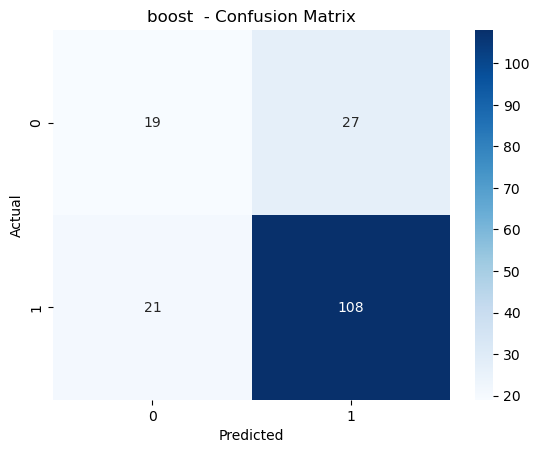

In [183]:
# Initialize and train XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict
xgb_X_test_scaled = xgb_model.predict(X_test_scaled)

print(f"\nbooste ")
print("Accuracy:", accuracy_score(y_test,xgb_X_test_scaled))
print("Classification Report:\n", classification_report(y_test,xgb_X_test_scaled))



# Plot Confusion Matrix
cm = confusion_matrix(y_test,xgb_X_test_scaled)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"boost  - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



GradientBoosting 
Accuracy: 0.7028571428571428
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.30      0.35        46
           1       0.77      0.84      0.81       129

    accuracy                           0.70       175
   macro avg       0.59      0.57      0.58       175
weighted avg       0.68      0.70      0.69       175



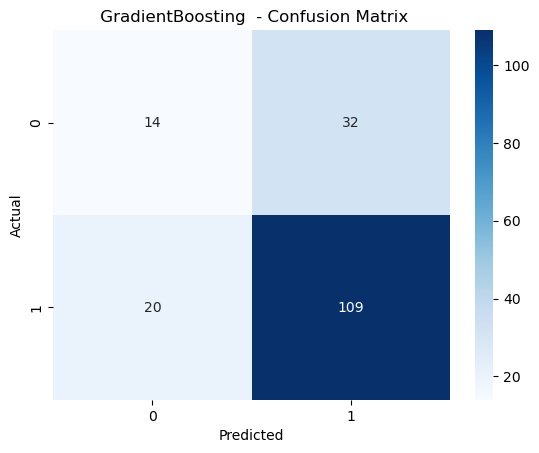

In [184]:
# Create and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predict on the test set
gb_X_test_scaled = gb_model.predict(X_test_scaled)

print(f"\nGradientBoosting ")
print("Accuracy:", accuracy_score(y_test,gb_X_test_scaled))
print("Classification Report:\n", classification_report(y_test,gb_X_test_scaled))


# Plot Confusion Matrix
cm = confusion_matrix(y_test,gb_X_test_scaled)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f" GradientBoosting  - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [187]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Liver_Disease'],
      dtype='object')

In [189]:
#Build model
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [191]:
#Visualize the decision tree
# Visualize the trained decision tree as text
feature_names = X.columns.tolist()
text_representation = export_text(model_dt, feature_names=feature_names)
print("\nDecision Tree Structure:\n")
print(text_representation)

text_representation = tree.export_text(model_dt)
print(text_representation)


Decision Tree Structure:

|--- Direct_Bilirubin <= 0.65
|   |--- Alkaline_Phosphotase <= 195.50
|   |   |--- Alkaline_Phosphotase <= 127.50
|   |   |   |--- Alamine_Aminotransferase <= 38.50
|   |   |   |   |--- Albumin <= 2.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Albumin >  2.95
|   |   |   |   |   |--- Total_Bilirubin <= 0.70
|   |   |   |   |   |   |--- Albumin_and_Globulin_Ratio <= 1.45
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Albumin_and_Globulin_Ratio >  1.45
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Total_Bilirubin >  0.70
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Alamine_Aminotransferase >  38.50
|   |   |   |   |--- class: 1
|   |   |--- Alkaline_Phosphotase >  127.50
|   |   |   |--- Total_Proteins <= 7.85
|   |   |   |   |--- Age <= 29.50
|   |   |   |   |   |--- Aspartate_Aminotransferase <= 72.00
|   |   |   |   |   |   |--- Aspartate_Aminotransferase <= 13.50
|   |   |   |   |   |   |  

In [196]:
df.columns


Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Liver_Disease'],
      dtype='object')

In [198]:
print(df)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     62       1             10.9               5.5                   699   
1     62       1              7.3               4.1                   490   
2     58       1              1.0               0.4                   182   
3     72       1              3.9               2.0                   195   
4     46       1              1.8               0.7                   208   
..   ...     ...              ...               ...                   ...   
577   60       1              0.5               0.1                   500   
578   40       1              0.6               0.1                    98   
579   52       1              0.8               0.2                   245   
580   31       1              1.3               0.5                   184   
581   38       1              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Proteins  

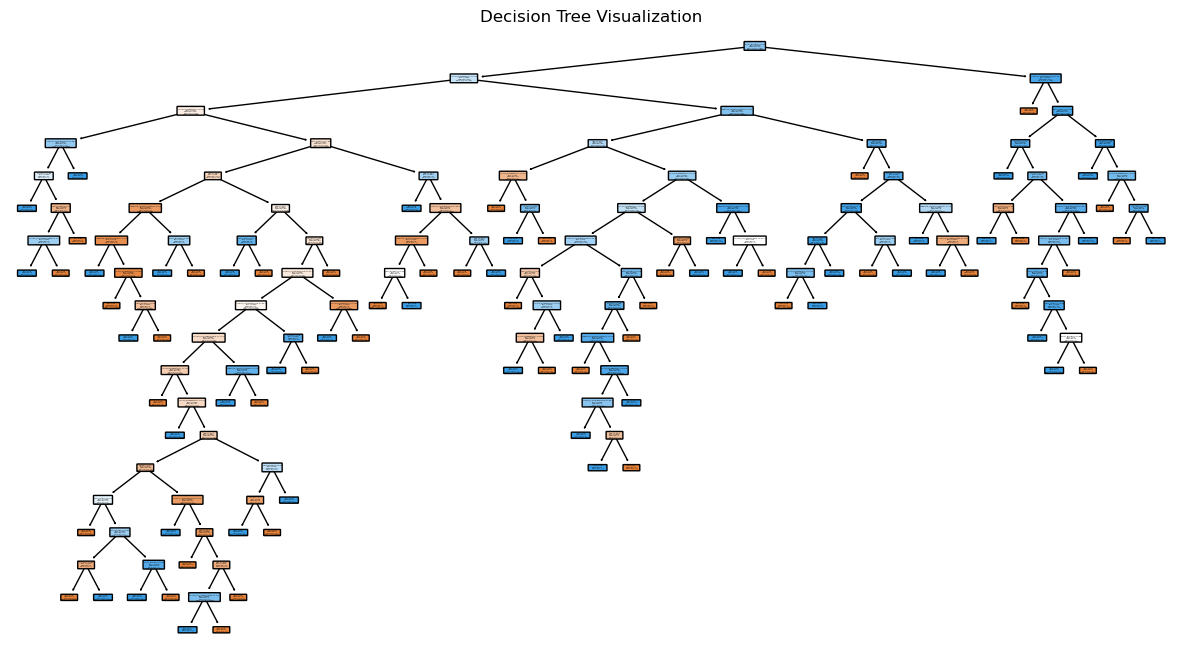

In [200]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 8))
plot_tree(model_dt, feature_names=feature_names, class_names=["No Disease", "Liver Disease"],
          filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()



$ Logistic Regression

<> Logistic Regression (Test Set) Evaluation Results:
Accuracy: 0.7371
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.24      0.32        46
           1       0.77      0.91      0.84       129

    accuracy                           0.74       175
   macro avg       0.64      0.58      0.58       175
weighted avg       0.70      0.74      0.70       175



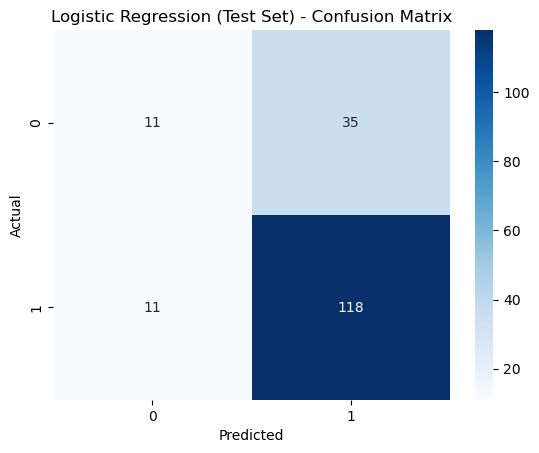


$ K-Nearest Neighbors

<> K-Nearest Neighbors (Test Set) Evaluation Results:
Accuracy: 0.6800
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.39      0.39        46
           1       0.78      0.78      0.78       129

    accuracy                           0.68       175
   macro avg       0.59      0.59      0.59       175
weighted avg       0.68      0.68      0.68       175



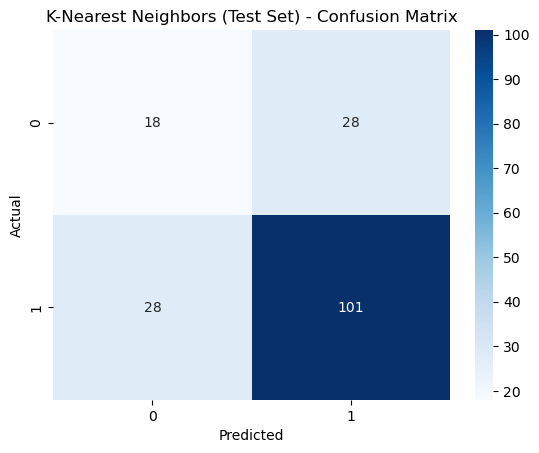


$ Support Vector Machine

<> Support Vector Machine (Test Set) Evaluation Results:
Accuracy: 0.7371
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.74      1.00      0.85       129

    accuracy                           0.74       175
   macro avg       0.37      0.50      0.42       175
weighted avg       0.54      0.74      0.63       175



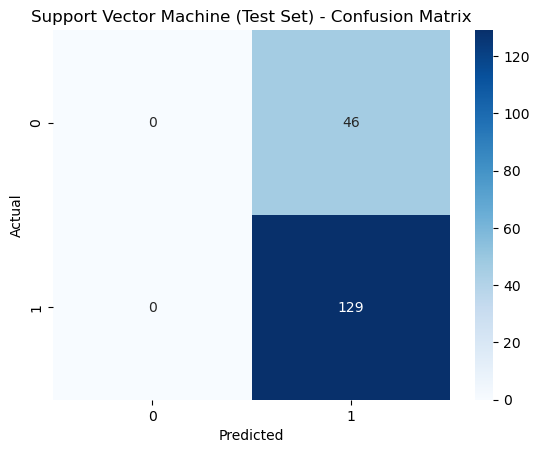


$ Decision Tree

<> Decision Tree (Test Set) Evaluation Results:
Accuracy: 0.6400
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.30      0.31        46
           1       0.75      0.76      0.76       129

    accuracy                           0.64       175
   macro avg       0.53      0.53      0.53       175
weighted avg       0.64      0.64      0.64       175



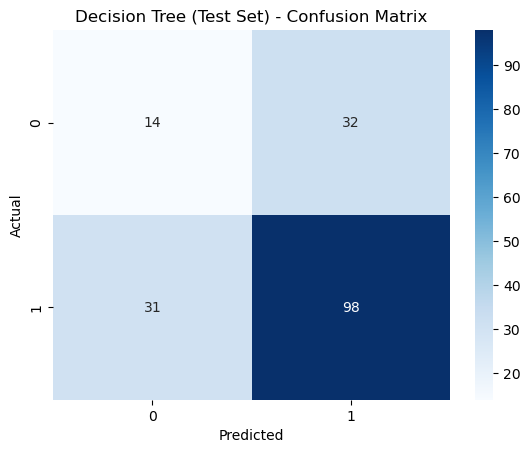


$ Random Forest

<> Random Forest (Test Set) Evaluation Results:
Accuracy: 0.7200
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.35      0.40        46
           1       0.79      0.85      0.82       129

    accuracy                           0.72       175
   macro avg       0.62      0.60      0.61       175
weighted avg       0.70      0.72      0.71       175



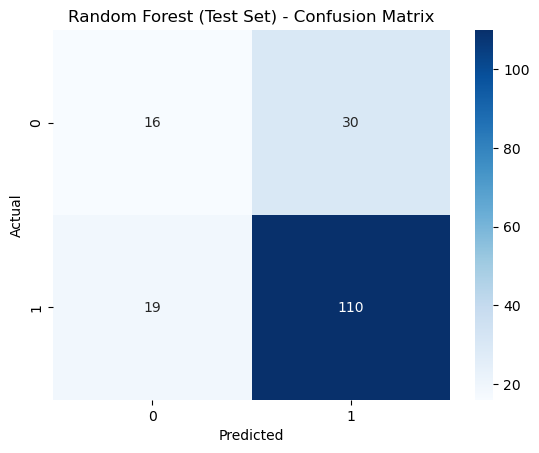


$ Naive Bayes

<> Naive Bayes (Test Set) Evaluation Results:
Accuracy: 0.5771
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.98      0.55        46
           1       0.98      0.43      0.60       129

    accuracy                           0.58       175
   macro avg       0.68      0.71      0.58       175
weighted avg       0.82      0.58      0.59       175



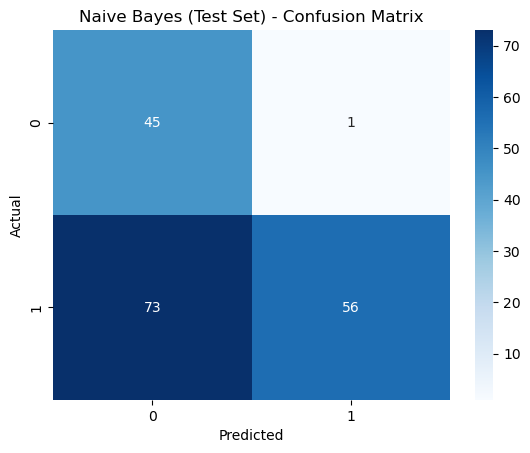


$ XGBoost

<> XGBoost (Test Set) Evaluation Results:
Accuracy: 0.7257
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.41      0.44        46
           1       0.80      0.84      0.82       129

    accuracy                           0.73       175
   macro avg       0.64      0.63      0.63       175
weighted avg       0.71      0.73      0.72       175



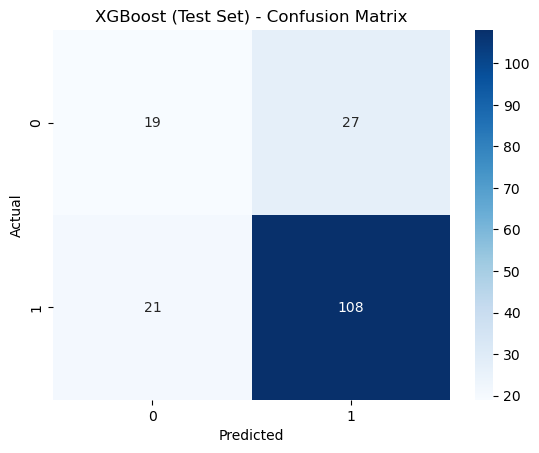


$ Gradient Boosting

<> Gradient Boosting (Test Set) Evaluation Results:
Accuracy: 0.7029
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.30      0.35        46
           1       0.77      0.84      0.81       129

    accuracy                           0.70       175
   macro avg       0.59      0.57      0.58       175
weighted avg       0.68      0.70      0.69       175



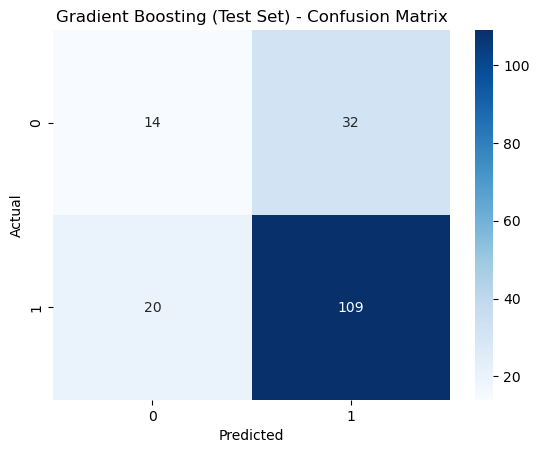

In [201]:

# Define all models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier( eval_metric='logloss', random_state=42),
     "Gradient Boosting":GradientBoostingClassifier(random_state=42)
}

def evaluate_model(name, y_true, y_pred):
    print(f"\n<> {name} Evaluation Results:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_true, y_pred, zero_division=0))
    
    # Confusion matrix plot
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Define 10-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Function to evaluate each model
def evaluate_model_cv(name, model, X_train, y_train, X_test, y_test):
    print(f"\n$ {name}")

    # Train on full training set and test on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    evaluate_model(f"{name} (Test Set)", y_test, y_pred)

# Loop through all models and evaluate
for name, model in models.items():
    evaluate_model_cv(name, model, X_train_scaled, y_train, X_test_scaled, y_test)


In [202]:

# Dictionary to store CV mean and Test Accuracy
results_dict = {}

# Loop through each model
for name, model in models.items():
    # Cross-validation (10-fold) on training data
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
  
    
    # Train on full training set
    model.fit(X_train_scaled, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test_scaled)
    test_acc = round(accuracy_score(y_test, y_pred), 4)
    
    # Store results
    results_dict[name] = {
        "Test Accuracy": test_acc
    }

# Convert dictionary to DataFrame
results_df = pd.DataFrame.from_dict(results_dict, orient='index').reset_index()
results_df.columns = ["Model", "Test Accuracy"]

# Display results table
print("\n📊 Model Comparison Table:\n")
print(results_df.sort_values(by="Test Accuracy", ascending=False))



📊 Model Comparison Table:

                    Model  Test Accuracy
0     Logistic Regression         0.7371
2  Support Vector Machine         0.7371
6                 XGBoost         0.7257
4           Random Forest         0.7200
7       Gradient Boosting         0.7029
1     K-Nearest Neighbors         0.6800
3           Decision Tree         0.6400
5             Naive Bayes         0.5771


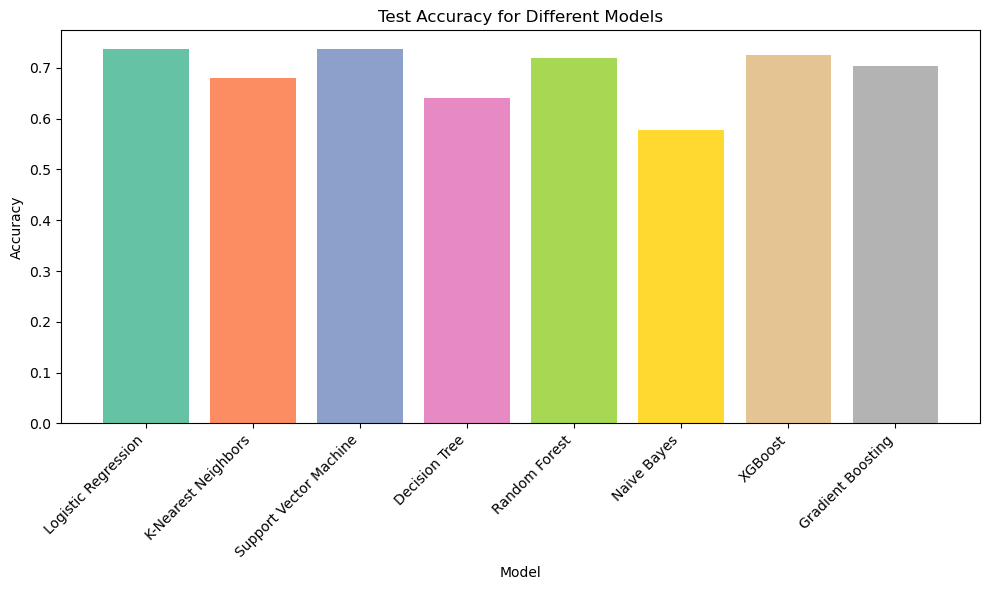

In [203]:

# Set a color palette
colors = sns.color_palette("Set2", len(results_df))  # You can also try "pastel", "husl", etc.

# Bar plot for Test Accuracy only
plt.figure(figsize=(10, 6))
x = range(len(results_df))

plt.bar(x, results_df["Test Accuracy"], color=colors)

# Labels and title
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Test Accuracy for Different Models")
plt.xticks(x, results_df["Model"], rotation=45, ha='right')

plt.tight_layout()
plt.show()


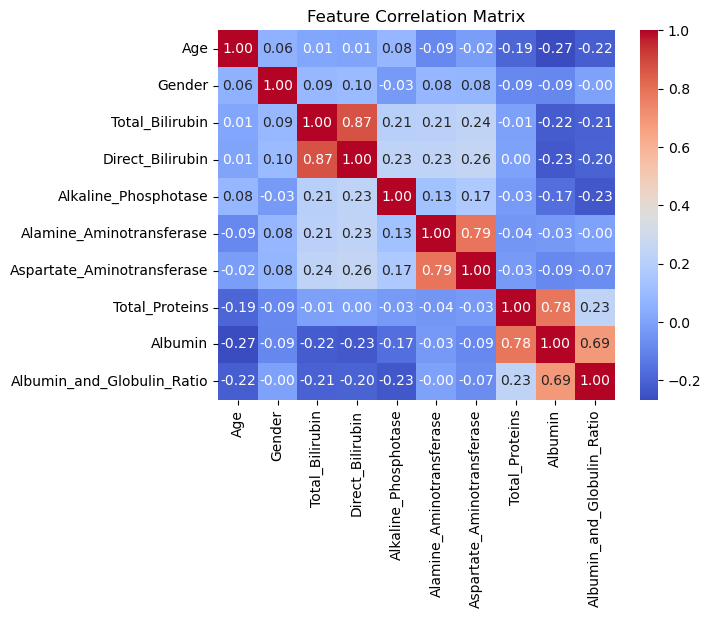

In [204]:
corr = pd.DataFrame(X).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


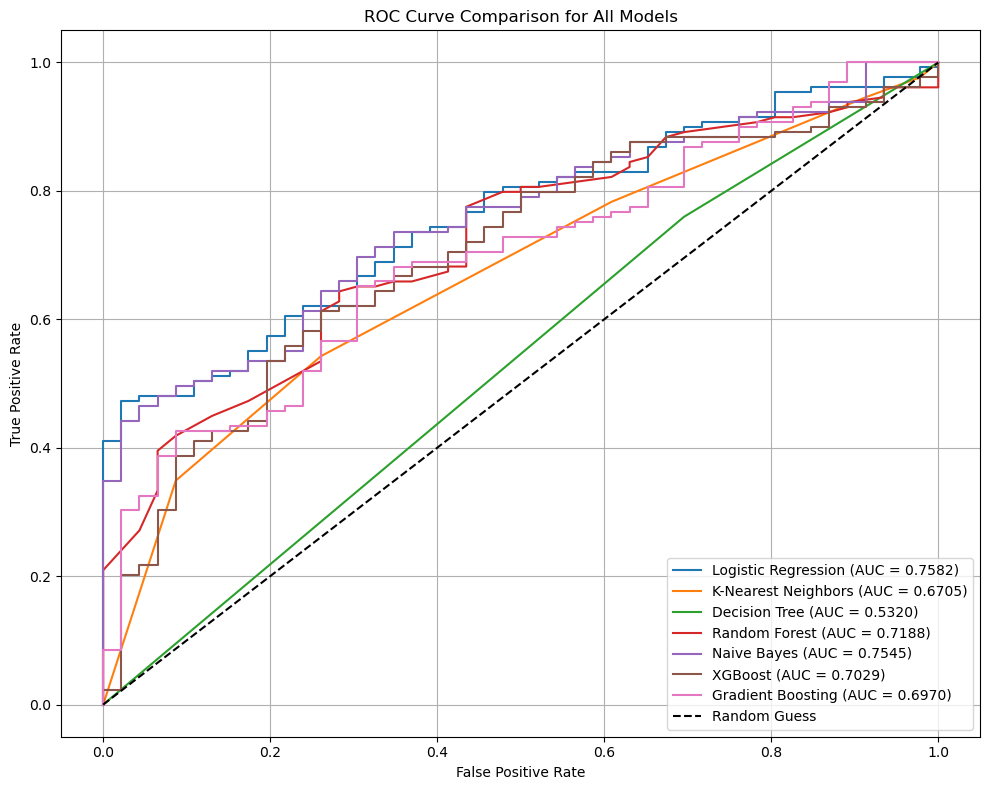

In [205]:
def plot_all_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    
    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            # Get predicted probabilities for the positive class
            y_probs = model.predict_proba(X_test)[:, 1]
            
            # Calculate AUC-ROC
            auc_score = roc_auc_score(y_test, y_probs)
            
            # Get ROC curve data
            fpr, tpr, _ = roc_curve(y_test, y_probs)
            
            # Plot ROC curve
            plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.4f})")
    
    # Plot random guess line
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    
    # Formatting
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Comparison for All Models")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function
plot_all_roc_curves(models, X_test_scaled, y_test)


In [206]:
# Dictionary to store CV mean, test accuracy, sensitivity, and specificity
results_dict = {}

# Loop through each model
for name, model in models.items():

    
    # Train on full training set
    model.fit(X_train_scaled, y_train)

    # Predict on test set
    y_pred = model.predict(X_test_scaled)
    test_acc = round(accuracy_score(y_test, y_pred), 4)

    # Confusion matrix on test set
    cm = confusion_matrix(y_test, y_pred)
    TN, FP = cm[0]
    FN, TP = cm[1]

    # Sensitivity and Specificity
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    # Store results
    results_dict[name] = {
        "Test Accuracy": test_acc,
        "Sensitivity": round(sensitivity, 4),
        "Specificity": round(specificity, 4)
    }

# Convert dictionary to DataFrame
results_df = pd.DataFrame.from_dict(results_dict, orient='index').reset_index()
results_df.columns = ["Model", "Test Accuracy", "Sensitivity", "Specificity"]

# Display results table
print("\n📊 Model Comparison Table with Sensitivity and Specificity:\n")
print(results_df.sort_values(by="Test Accuracy", ascending=False))



📊 Model Comparison Table with Sensitivity and Specificity:

                    Model  Test Accuracy  Sensitivity  Specificity
0     Logistic Regression         0.7371       0.9147       0.2391
2  Support Vector Machine         0.7371       1.0000       0.0000
6                 XGBoost         0.7257       0.8372       0.4130
4           Random Forest         0.7200       0.8527       0.3478
7       Gradient Boosting         0.7029       0.8450       0.3043
1     K-Nearest Neighbors         0.6800       0.7829       0.3913
3           Decision Tree         0.6400       0.7597       0.3043
5             Naive Bayes         0.5771       0.4341       0.9783


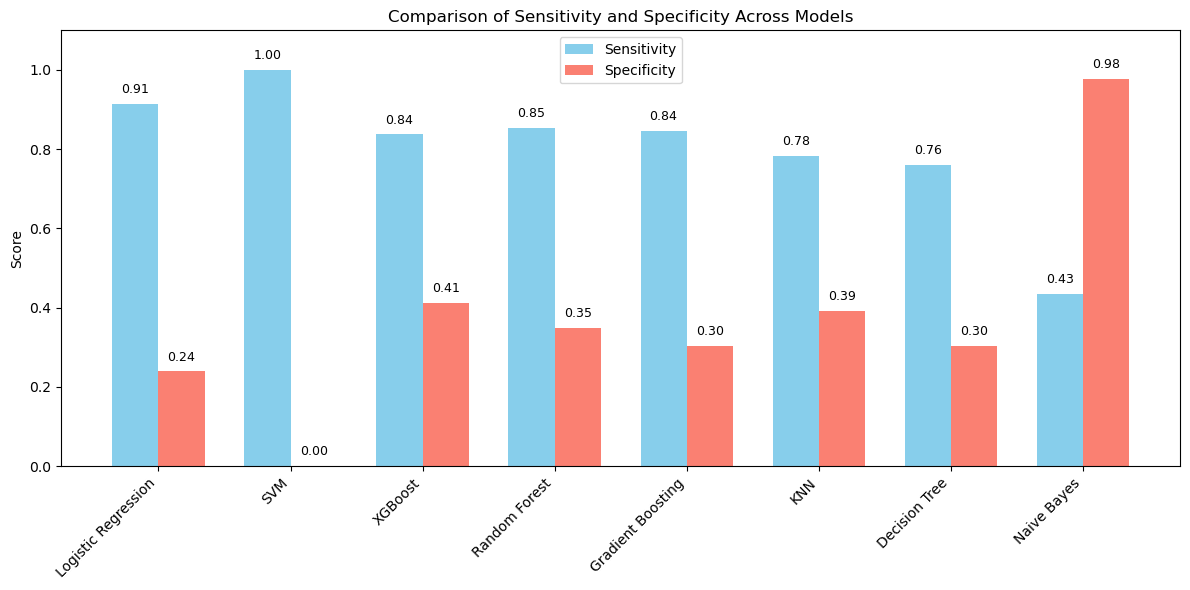

In [207]:

# Model performance data
models = [
    'Logistic Regression', 'SVM', 'XGBoost', 'Random Forest',
    'Gradient Boosting', 'KNN', 'Decision Tree', 'Naive Bayes'
]
sensitivity = [0.9147, 1.0000, 0.8372, 0.8527, 0.8450, 0.7829, 0.7597, 0.4341]
specificity = [0.2391, 0.0000, 0.4130, 0.3478, 0.3043, 0.3913, 0.3043, 0.9783]

# Position of bars on x-axis
x = np.arange(len(models))
width = 0.35  # width of each bar

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars side by side
bars1 = ax.bar(x - width/2, sensitivity, width, label='Sensitivity', color='skyblue')
bars2 = ax.bar(x + width/2, specificity, width, label='Specificity', color='salmon')

# Add labels and title
ax.set_ylabel('Score')
ax.set_title('Comparison of Sensitivity and Specificity Across Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_ylim(0, 1.1)
ax.legend()

# Annotate bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}',
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
